5.对分割图像自选方法提取边缘。

(-0.5, 299.5, 245.5, -0.5)

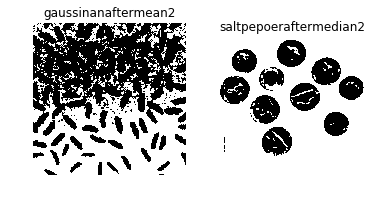

In [2]:
from skimage import io
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from skimage.morphology import disk
import skimage.filters.rank as sfr
from skimage import exposure
from skimage import filters
gaussinan = io.imread(r'.\pic\gaussiannoiseimage.bmp',0)
saltpepoer = io.imread(r'.\pic\saltpepoernoiseimage.bmp')
def mean_img(img,n):
    imgt = sfr.mean(img, disk(n))
    return imgt
def median_img(img,n):
    imgt = sfr.median(img, disk(n))
    return imgt
saltpepoeraftermedian = median_img(saltpepoer,2)
gaussinanaftermean = mean_img(gaussinan,2)
gaussinanaftermean1=exposure.equalize_hist(gaussinanaftermean)
saltpepoeraftermedian1 = exposure.equalize_adapthist(saltpepoeraftermedian, clip_limit=0.03)
def cutoff(image):
    thresh = filters.threshold_otsu(image)  
    cutted =(image <= thresh)*1.0 
    return cutted
gaussinanaftermean2 = cutoff(gaussinanaftermean1)
saltpepoeraftermedian2 = cutoff(saltpepoeraftermedian1)
plt.subplot(121);plt.title('gaussinanaftermean2');plt.imshow(gaussinanaftermean2, cmap ='gray')
plt.axis("off")
plt.subplot(122);plt.title('saltpepoeraftermedian2');plt.imshow(saltpepoeraftermedian2, cmap ='gray')
plt.axis("off")

In [ ]:
import cv2 as cv
import numpy as np
def edge(img):
    blurred = cv.GaussianBlur(img,(3,3),0)
    gray=cv.cvtColor(blurred,cv.COLOR_RGB2GRAY)
    xgrad=cv.Sobel(gray,cv.CV_16SC1,1,0)
    ygrad=cv.Sobel(gray,cv.CV_16SC1,0,1)
    edge_output=cv.Canny(xgrad,ygrad,50,150)
    #图一
    cv.imshow("edge",edge_output)
 
    dst=cv.bitwise_and(img,img,mask=edge_output)
    #图二（彩色）
    cv.imshow('cedge',dst)

src=cv.imread(r'.\pic\luna.jpg')
cv.imshow('def',src)
edge(src)
cv.waitKey(0)
cv.destroyAllWindows()

上面这个对彩色图片好用

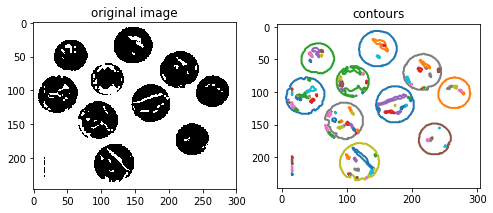

In [3]:
import matplotlib.pyplot as plt
from skimage import measure,data,color

#生成二值测试图像
img=saltpepoeraftermedian2

#检测所有图形的轮廓
contours = measure.find_contours(img, 0.5)

#绘制轮廓
fig, axes = plt.subplots(1,2,figsize=(8,8))
ax0, ax1= axes.ravel()
ax0.imshow(img,plt.cm.gray)
ax0.set_title('original image')

rows,cols=img.shape
ax1.axis([0,rows,cols,0])
for n, contour in enumerate(contours):
    ax1.plot(contour[:, 1], contour[:, 0], linewidth=2)
ax1.axis('image')
ax1.set_title('contours')
plt.show()